In [5]:
import os
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from plot_settings import define_plot_settings

project_dir = os.path.abspath('..')
print(f"Project directory: {project_dir}")
sys.path.append(os.path.join(project_dir))

Project directory: /work3/mtaho/PhD/DeepLearning/DeepLearning_PAINN


### Benchmark results (from PaiNN paper)

Here, the benchmark results from the PaiNN paper are restated:

In [6]:
data = np.array([[0.012, 0.045, 27.6, 20.4, 45.7, 0.066, 1.28, 5.85, 5.83, 5.98, 7.35, 0.024]])
columns = ['mu', 'alpha', 'eps_HOMO', 'eps_LUMO', 'deps', 'R2', 'ZPVE', 'U0', 'U', 'H', 'G','cv']
df_benchmark = pd.DataFrame(data=data, columns=columns)

df_benchmark

,mu,alpha,eps_HOMO,eps_LUMO,deps,R2,ZPVE,U0,U,H,G,cv
0,0.012,0.045,27.6,20.4,45.7,0.066,1.28,5.85,5.83,5.98,7.35,0.024


## Training history

Load training history data

In [ ]:
relative_path = 'runs/train/2024-11-21/08-58_6'
results_path = f"{project_dir}/{relative_path}"

data_path = f"{results_path}/data.pickle"

with open(data_path, 'rb') as f:
    data = pickle.load(f)

for key in data:
    data[key] = np.array(data[key])

In [8]:
data.keys()

dict_keys(['train_loss', 'val_loss', 'train_MAE', 'val_MAE', 'lr', 'epoch', 'test_MAE'])

Plot training progress and results

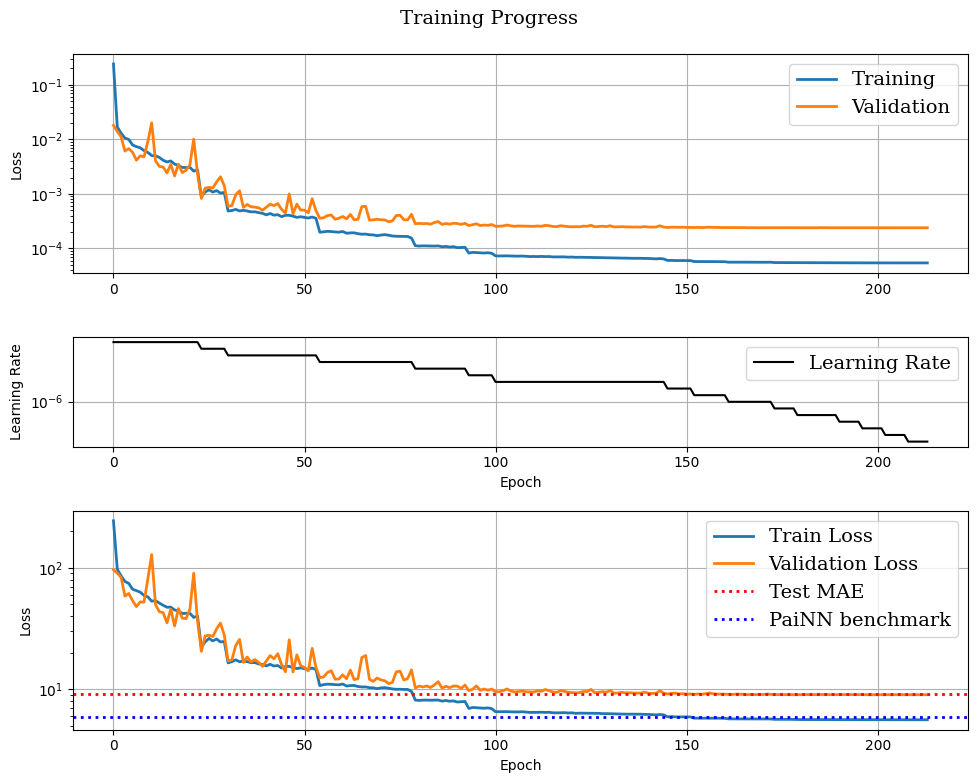

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), height_ratios=[1, 0.5, 1])

define_plot_settings(14)

lw = 2.0
# Plot primary y-axis (losses) on the first subplot
ax1.semilogy(data['epoch'], data['train_loss'],'-', lw=lw, label='Training')
ax1.semilogy(data['epoch'], data['val_loss'],'-', lw=lw, label='Validation')
# ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')  # Legend for the first y-axis
ax1.grid(True)

# Plot secondary y-axis (learning rate) on the second subplot
ax2.semilogy(data['epoch'], data['lr'], 'k-', label='Learning Rate')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning Rate', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.legend(loc='upper right')  # Combine legends
ax2.grid(True)

plt.suptitle('Training Progress')
fig.tight_layout()

# Plot primary y-axis (losses) on the first subplot
ax3.semilogy(data['epoch'], data['train_MAE'],'-', lw=lw, label='Train Loss')
ax3.semilogy(data['epoch'], data['val_MAE'],'-', lw=lw, label='Validation Loss')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
    # Plot test MAE as a horizontal line
test_mae = data['test_MAE'][0]  # Convert tensor to a scalar
ax3.axhline(y=test_mae, color='r', linestyle=':', lw=lw, label='Test MAE')
ax3.axhline(y=5.85, color='b', linestyle=':', lw=lw, label='PaiNN benchmark')
ax3.legend(loc='upper right')  # Update legend to include Test MAE
ax3.grid(True)
fig.tight_layout()
plt.show()

## Trained model 

Load trained model

In [10]:
from src.models import model_loader
checkpoint_path = f"{project_dir}/examples/model_checkpoint.pth"

painn, metadata = model_loader.load_checkpoint(checkpoint_path);

print(painn)


/work3/mtaho/PhD/DeepLearning/DeepLearning_PAINN/src/models/model_loader.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)


FileNotFoundError: [Errno 2] No such file or directory: '/work3/mtaho/PhD/DeepLearning/DeepLearning_PAINN/examples/model_checkpoint.pth'